In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
gdf1 = gpd.read_file(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_test.shp', encoding='latin-1')
gdf2 = gpd.read_file(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_FIN.shp', encoding='latin-1')

gdf21 = gdf2[['osmid', 'build_prog']]
merged_gdf = gdf1.merge(gdf21, on='osmid')
merged_gdf.head(10)

,osmid,amenity,name,building,addr_house,addr_stree,addr_hou_1,addr_postc,building_l,start_date,...,building_m,height,roof_colou,roof_mater,roof_shape,residentia,roof_level,addr_neigh,geometry,build_prog
0,30527021,NaN,Sim Lim Square,retail,1,Rochor Canal Road,NaN,188504,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.85308 1.30254, 103.85302 1.30259...",deco_box
1,32342169,NaN,National Museum of Singapore,public,93,Stamford Road,NaN,178897,NaN,1887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.84797 1.29710, 103.84808 1.29718...",civic
2,32507125,police,Police Cantonment Complex,yes,391,New Bridge Road,NaN,088762,NaN,2001,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83885 1.27855, 103.83912 1.27869...",unknown
3,32507157,NaN,NaN,office,11,Outram Road,NaN,169078,NaN,1981,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83794 1.28024, 103.83794 1.28044...",glass_box
4,32507166,NaN,NaN,public,3,Second Hospital Avenue,Health Promotion Board Building,168937,NaN,1981,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83840 1.27965, 103.83823 1.27965...",civic
5,32507173,NaN,National Dental Centre Singapore,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83795 1.27950, 103.83806 1.27950...",unknown
6,32750183,NaN,Sentosa Golf Club,yes,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.82893 1.24424, 103.82895 1.24428...",unknown
7,33913082,NaN,NaN,yes,NaN,NaN,NaN,NaN,1,NaN,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83843 1.27266, 103.83776 1.27264...",unknown
8,33913487,NaN,St. James Power Station,industrial,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.82456 1.26470, 103.82456 1.26469...",industrial
9,37354400,NaN,NaN,office,456,Alexandra Road,Fragrance Empire Building,119962,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.80163 1.27530, 103.80161 1.27526...",glass_box


In [31]:
merged_gdf['build_prog'] = merged_gdf['build_prog'].replace('unknown', np.nan)

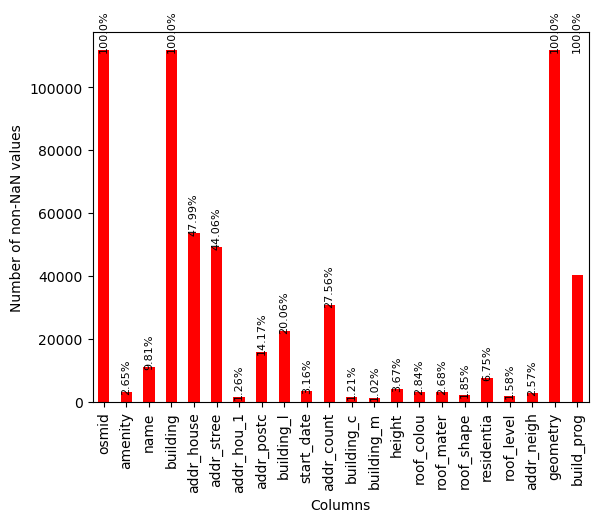

In [32]:
# get the count of non-NaN values for each column
non_nan_count = merged_gdf.count()

# create a bar plot of non-NaN counts with red color
ax = non_nan_count.plot(kind='bar', color='red')

# add the count percentage above each bar
for i, v in enumerate(counts):
    ax.text(i, v+5, str(round((v/merged_gdf.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [34]:
gdfx = merged_gdf
gdfx.keys()

Index(['osmid', 'amenity', 'name', 'building', 'addr_house', 'addr_stree',
       'addr_hou_1', 'addr_postc', 'building_l', 'start_date', 'addr_count',
       'building_c', 'building_m', 'height', 'roof_colou', 'roof_mater',
       'roof_shape', 'residentia', 'roof_level', 'addr_neigh', 'geometry',
       'build_prog'],
      dtype='object')

In [47]:
gdfx['start_date'].unique()

array([  nan, 1887., 2001., 1981., 1986., 2009., 1985., 1988., 1974.,
       1980., 1995., 2005., 1976., 1975., 1973., 2016., 2002., 2000.,
       2020., 1880., 1968., 1972., 1983., 1939., 1993., 1949., 2006.,
       1998., 2013., 1997., 1984., 1979., 1996., 1884., 1930., 2015.,
       1978., 1982., 1924., 1977., 1999., 1960., 1990., 1971., 1830.,
       1969., 1987., 2007., 1928., 2004., 1958., 1992., 1954., 2008.,
       1927., 2011., 1965., 1970., 1945., 1994., 1991., 1989., 1964.,
       1841., 1904., 2010., 1929., 2003., 1820., 1860., 1926., 1908.,
       1912., 1878., 1892., 1862., 1847., 1870., 1843., 1932., 1920.,
       1879., 1855., 1899., 1951., 2012., 2017., 1957., 1914., 2014.,
       2019., 1961., 1937., 1898., 1891., 2018., 1839., 1906., 1861.,
       1835., 1905., 1885., 1909., 1867., 1883., 1963., 1910., 1913.,
       2021., 1844., 2022., 1874., 1947., 1950., 2023., 1925., 1827.,
       1907., 1952., 1923., 1903., 1882., 1894., 1967., 1966., 1942.])

In [37]:
#count total number of no-value rows in building column
gdfx['start_date'].value_counts().get('10/2017', 0)

1

In [38]:
#replace disticnctive format of year
gdfx['start_date'] = gdfx['start_date'].replace('10/2017', '2017')

In [40]:
#get only years
gdfx['start_date'] = gdfx['start_date'].str.split('-').str[0].fillna('')

In [44]:
#convert to integer
gdfx['start_date'] = pd.to_numeric(gdfx['start_date'], errors='coerce')

In [49]:
#add column with age ranges
def generate_ranges(start_year, end_year, step):
    ranges = []
    for i in range(start_year, end_year+1, step):
        end = min(i+step-1, end_year)
        ranges.append(f"{i}-{end}")
    return ranges

gdfx['build_agerange'] = gdfx['start_date'].apply(lambda x: generate_ranges(1800, 2025, 25)[int(x-1800)//25] if not np.isnan(x) else np.NaN)

In [50]:
gdfx.shape

(111889, 23)

In [51]:
gdfx.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
# Save the modified shapefile
merged_gdf.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_FIN.shp')